In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
#Libraries for ML
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix 
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv("diabetes.csv")

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [18]:
data.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [19]:
print('Data Shape',data.shape)
print(data.info()) 
des = data.describe()
des.T

Data Shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


count        mean  ...        75%     max
Pregnancies               768.0    3.845052  ...    6.00000   17.00
Glucose                   768.0  120.894531  ...  140.25000  199.00
BloodPressure             768.0   69.105469  ...   80.00000  122.00
SkinThickness             768.0   20.536458  ...   32.00000   99.00
Insulin                   768.0   79.799479  ...  127.25000  846.00
BMI                       768.0   31.992578  ...   36.60000   67.10
DiabetesPedigreeFunction  768.0    0.471876  ...    0.62625    2.42
Age                       768.0   33.240885  ...   41.00000   81.00
Outcome                   768.0    0.348958  ...    1.00000    1.00

[9 rows x 8 columns]

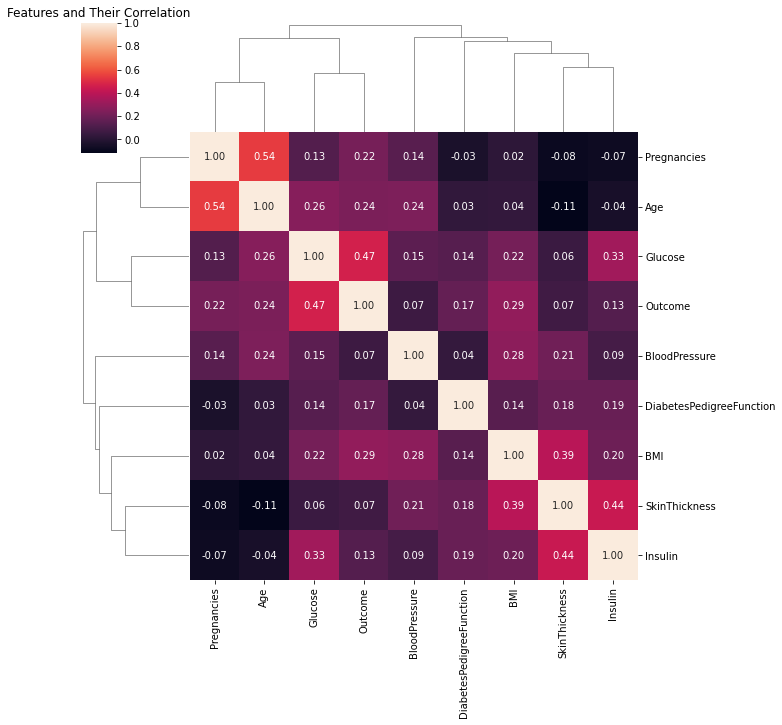

In [20]:
corrl_data = data.corr() 
sns.clustermap(corrl_data,annot= True,fmt = '.2f')
plt.title('Features and Their Correlation')
plt.show();


In [21]:
test_size = 0.3
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [23]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = LR, X= x_train, y=y_train, cv=10)
print("Avg Accuracies: ",np.mean(accuraccies))
print("SD Accuracies: ",np.std(accuraccies))

Avg Accuracies:  0.7727812718378756
SD Accuracies:  0.06523084556360821


In [24]:
LR.fit(x_train,y_train)
print("Test Accuracy {}".format(LR.score(x_test,y_test))) 

LRscore = LR.score(x_test,y_test)


Test Accuracy 0.7402597402597403


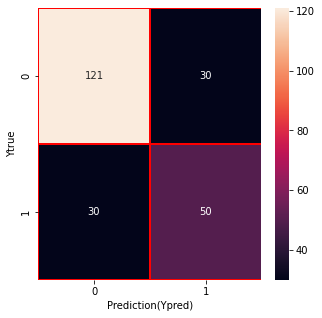

In [25]:
#Confusion Matrix

yprediciton1= LR.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton1)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [26]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()


In [27]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = NB, X= x_train, y=y_train, cv=35)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standard Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7596428571428572
Standart Deviation Accuracies:  0.0817878803345246


In [28]:
NB.fit(x_train,y_train) #learning
#prediction
print("Accuracy of NB Score: ", NB.score(x_test,y_test))

NBscore= NB.score(x_test,y_test)

Accuracy of NB Score:  0.7445887445887446


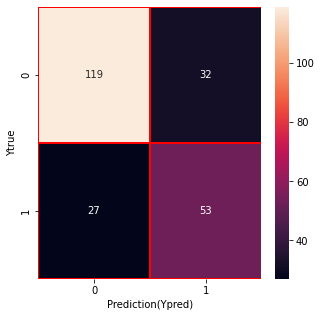

In [29]:
#Confusion Matrix

yprediciton4= NB.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton4)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 82, random_state=42) #n_estimator = DT

In [31]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = RFC, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7633123689727463
Standart Deviation Accuracies:  0.052904316124638154


In [32]:
RFC.fit(x_train,y_train) # learning
print("Random Forest Score: ",RFC.score(x_test,y_test))
RFCscore=RFC.score(x_test,y_test)

Random Forest Score:  0.7359307359307359


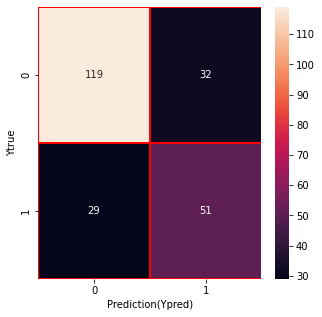

In [33]:
#Confusion Matrix

yprediciton6= RFC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton6)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()